<a href="https://colab.research.google.com/github/krislars/BesanconJupyter/blob/main/Besancon_for_Rubin_DP0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Besancon for Rubin DP0

By: Kristen Larson larsonk@wwu.edu

This notebook demonstrates how to create a Besançon stellar model within the Google Colab or JupyterLab environment.  Do not attempt to "run all" before entering your Besançon username and password below.  You will need to visit https://model.obs-besancon.fr/ws/subscribe.php to make an account for yourself if you do not have one already. 

Questions and suggestions are welcome!

Tested Oct 14, 2021

In [1]:
import urllib.request
from astropy.io import ascii
from matplotlib import pyplot as plt
from matplotlib import colors

The python script by Raphael Melior that is provided at the Besançon website uses an operating system command that does not work on Google colab and causes the script to crash.  I have posted a version to GitHub that does not have the problem call.  The next two lines download them both into your Google Colab working space.

In [ ]:
urllib.request.urlretrieve('https://model.obs-besancon.fr/tools/galmod_client.py', 'galmod_client.py')

In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/krislars/BesanconJupyter/main/galmod_client_nouser.py', 'galmod_client_nouser.py')

Enter your Besançon username and password between the quotes in the cell below.  They will be used in subsequent cells.

In [4]:
myUser = " "  # Your username goes here
myPass = " " # Your password goes here

If you have used the web form to select parameters for a Besançon run, you may wonder how to convert your choices to command-line variables.  I found that logging in at the direct web access site https://model.obs-besancon.fr/ws/ and clicking on a job number, I could see the proper varable names for each of my settings.  In particular, note that <code>KLEC 17</code> selects the SDSS+IR filters.

The first time I run the python script, I use the <code>--create</code> flag so I can check the model and add more parameters, if necessary.  I plan to use the results of this model to find extinction in a dataset, so I explicitly call for no extinction in the model with <code>ADIF 0</code> and <code>SIGAV 0</code>.

In [ ]:
%run galmod_client_nouser.py --url "https://model.obs-besancon.fr/ws/" --user $myUser --pass $myPass --create -p KLEH 2 -p Coor1_min 61.5 -p Coor1_max 62.5 -p Coor2_min -37.5 -p Coor2_max -36.5 -p SOLI 1 -p KLEC 17 -p acol u-g,g-r,r-i,i-z -p ref_filter g -p KLEP 0 -p ADIF 0 -p SIGAV 0

Output of the cell above includes the number of your job at the very top.  Enter that number in the cell below.

In [29]:
myJob =      # Your job number goes here

The next two lines modify the same job with more variables. The first line limits the magnitude and the second sets the uncertainty and populates other fields with the correct number of varables to fix the error noted in the output above.

In [ ]:
%run galmod_client_nouser.py --url "https://model.obs-besancon.fr/ws/" --user $myUser --pass $myPass --job $myJob -p band_max 99.0,22.0,99.0,99.0,99.0,99.0,99.0,99.0 -p band_min 0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0  

In [ ]:
%run galmod_client_nouser.py --url "https://model.obs-besancon.fr/ws/" --user $myUser --pass $myPass --job $myJob -p errBand_A 0,0,0,0,0,0,0,0 -p errBand_B 0,0,0,0,0,0,0,0 -p errBand_C 0,0,0,0,0,0,0,0 -p band_step 1,1,1,1,1,1,1,1

Finally I am satisfied, so I use the <code>--run</code> flag.

In [ ]:
%run galmod_client_nouser.py --url "https://model.obs-besancon.fr/ws/" --user $myUser --pass $myPass --job $myJob --run

This next simple line checks the status of the job, and if finished, provides the output file link.

In [ ]:
%run galmod_client_nouser.py --url "https://model.obs-besancon.fr/ws/" --user $myUser --pass $myPass --job $myJob

When the job is finished, note the ftp link in the output and copy that link between the quotes in the cell below.

In [35]:
model=ascii.read("https://model.obs-besancon.fr/result/ws.AABzRw.8c332cdc55e7812c/output") # Your ftp output goes here, something like "ftp://ftp.obs-besancon.../output

The output will be in a standard Astropy table...

In [36]:
model

g,u-g,g-r,r-i,i-z,mux,muy,HRV,UU,VV,WW,Px,Mv,CL,Typ,Teff,logg,Pop,Age,Mass,Mbol,Radius,[M/H],[a/Fe],longitude,latitude,RAJ2000,DECJ2000,Dist,x_Gal,y_Gal,z_Gal,Av,errPx,errMux,errMuy,errHrv,errMv,errMass,errAge,errTeff,errLogg,errMet,errAlphaFe,errBand_g,errBand_u,errBand_r,errBand_i,errBand_z
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20.249,3.194,1.457,1.398,0.798,-26.037,16.482,-9.13,-0.66,15.63,-2.87,0.01029,14.38,5,7.45,3130.0,5.08,3,1.6404,0.276,11.685,0.142,-0.179,-0.001,239.519867,-48.37606,61.13306,-37.260899,0.0971,-8.0327,-0.0556,-0.0576,0.0,0.0,1.0,1.0,2.0,0.0,0.1,0.1,50.0,0.1,0.1,0.02,0.0,0.0,0.0,0.0,0.0
18.951,2.959,1.391,1.331,0.769,-12.682,11.808,9.55,-5.4,0.84,-11.54,0.01115,13.29,5,7.4,3248.0,4.87,1,0.219,0.066,10.885,0.196,0.086,-0.026,239.971237,-48.267384,61.271496,-37.560574,0.0897,-8.0299,-0.0517,-0.052,0.0,0.0,1.0,1.0,2.0,0.0,0.1,0.1,50.0,0.1,0.1,0.02,0.0,0.0,0.0,0.0,0.0
16.593,2.928,1.304,0.995,0.571,27.998,75.1,41.18,-47.05,-14.55,-20.75,0.01074,10.92,5,7.25,3388.0,4.77,6,5.9668,0.475,9.61,0.292,0.272,0.002,239.960861,-47.746986,61.927879,-37.550728,0.0931,-8.0313,-0.0542,-0.0539,0.0,0.0,1.0,1.0,2.0,0.0,0.1,0.1,50.0,0.1,0.1,0.02,0.0,0.0,0.0,0.0,0.0
18.055,3.062,1.345,1.178,0.679,-28.367,51.578,28.16,-26.0,4.89,-29.14,0.00968,12.12,5,7.35,3328.0,4.84,3,1.3962,0.206,10.193,0.248,0.071,0.035,240.075272,-48.04641,61.550606,-37.629345,0.1034,-8.0345,-0.0599,-0.0619,0.0,0.0,1.0,1.0,2.0,0.0,0.1,0.1,50.0,0.1,0.1,0.02,0.0,0.0,0.0,0.0,0.0
18.001,3.051,1.324,1.087,0.625,31.556,-21.811,-10.83,8.89,-11.05,20.71,0.00854,11.82,5,7.3,3506.0,4.93,7,8.5622,0.396,9.874,0.273,0.046,0.024,239.288269,-48.003254,61.598965,-37.102634,0.117,-8.04,-0.0673,-0.072,0.0,0.0,1.0,1.0,2.0,0.0,0.1,0.1,50.0,0.1,0.1,0.02,0.0,0.0,0.0,0.0,0.0
21.15,3.184,1.446,1.441,0.828,86.313,63.648,3.89,-51.83,-15.37,31.21,0.00804,14.75,5,7.5,3077.0,5.08,6,5.8721,0.114,11.909,0.13,-0.18,0.042,239.5961,-48.260765,61.278408,-37.310814,0.1244,-8.0419,-0.0714,-0.0778,0.0,0.0,1.0,1.0,2.0,0.0,0.1,0.1,50.0,0.1,0.1,0.02,0.0,0.0,0.0,0.0,0.0
20.483,3.19,1.466,1.358,0.771,-36.412,30.023,0.95,-5.59,23.58,-11.65,0.00804,14.07,5,7.45,3046.0,4.93,7,8.5275,0.25,11.462,0.156,-0.382,-0.025,239.610519,-48.30658,61.220871,-37.320713,0.1244,-8.0419,-0.0714,-0.0779,0.0,0.0,1.0,1.0,2.0,0.0,0.1,0.1,50.0,0.1,0.1,0.02,0.0,0.0,0.0,0.0,0.0
20.201,3.054,1.419,1.365,0.786,36.989,26.419,23.56,-28.76,-17.78,-0.89,0.00831,13.89,5,7.45,3201.0,4.86,5,4.0348,0.099,11.241,0.17,-0.071,0.016,240.477951,-48.444637,61.046318,-37.896843,0.1204,-8.0393,-0.0695,-0.0751,0.0,0.0,1.0,1.0,2.0,0.0,0.1,0.1,50.0,0.1,0.1,0.02,0.0,0.0,0.0,0.0,0.0
19.729,3.077,1.456,1.259,0.715,32.516,-27.556,48.14,-9.62,-48.86,-22.75,0.00786,13.27,5,7.4,3209.0,5.14,6,5.9544,0.207,10.816,0.201,-0.416,0.023,239.78537,-47.97506,61.639099,-37.434982,0.1272,-8.0429,-0.0736,-0.0795,0.0,0.0,1.0,1.0,2.0,0.0,0.1,0.1,50.0,0.1,0.1,0.02,0.0,0.0,0.0,0.0,0.0


...which means you can do fun things, like plot it.

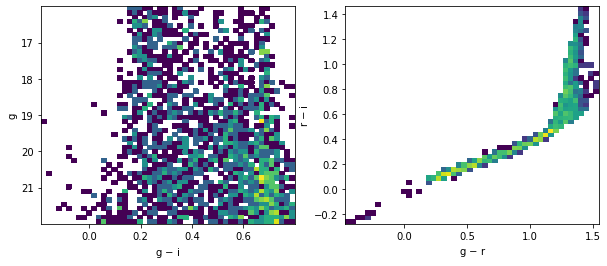

In [38]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].hist2d(model['g-r']-model['r-i'], model['g'],bins=50,norm=colors.LogNorm())
ax[0].set_xlabel('g $-$ i')
ax[0].set_ylabel('g')
ax[0].invert_yaxis()
ax[1].hist2d(model['g-r'], model['r-i'],bins=50,norm=colors.LogNorm())
ax[1].set_xlabel('g $-$ r')
ax[1].set_ylabel('r $-$ i')
plt.show()

If you like your model, you should save it to disk before the output expires on the Besançon servers.  

In [ ]:
from google.colab import files

ascii.write(model,'output.txt',overwrite=True)

files.download('output.txt')

To learn more how to work with files on your local machine or on your Google drive instead of just on the ephemeral workspace that opens with Colab, check out the examples at https://colab.research.google.com/notebooks/io.ipynb.